#Assignment on Logistic Regression || Module-06
**Assignment Code:** DA-AG-011

**Learner's Name:** Suraj Vishwakarma  
**Email:** vishsurajfor@gmail.com

This notebook contains the solution of 10 questions from the assignment  and runnable Python code where applicable.

## Q1. What is Logistic Regression, and how does it differ from Linear Regression?

**Answer**- **Logistic Regression** is a statistical method used for predicting the probability of a categorical dependent variable, typically binary (e.g., Yes/No, 0/1, Pass/Fail). Unlike linear regression which predicts continuous values, logistic regression maps predictions to a probability range between 0 and 1 using the **sigmoid (logistic) function**:

$$
P(Y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

### Key Differences:
- **Nature of Output:**
  - *Linear Regression:* Predicts continuous numerical values.  
  - *Logistic Regression:* Predicts probabilities for categorical outcomes.  

- **Error Measurement:**
  - *Linear Regression:* Uses metrics like Mean Squared Error (MSE).  
  - *Logistic Regression:* Uses measures like Log Loss or Cross-Entropy.  

- **Assumption of Relationship:**
  - *Linear Regression:* Assumes a linear relationship between independent and dependent variables.  
  - *Logistic Regression:* Models a **log-odds (logit)** relationship, which is non-linear.  

- **Application:**
  - *Linear Regression:* Forecasting sales, predicting house prices.  
  - *Logistic Regression:* Spam detection, medical diagnosis (disease present/absent).  

**In summary,** logistic regression is best suited for classification tasks where the output is categorical, while linear regression is suitable for predicting continuous outcomes.

### Q2. Explain the role of the Sigmoid function in Logistic Regression.  

**Answer**-The **Sigmoid function** is central to Logistic Regression because it converts any real-valued number into a probability between $0$ and $1$. This makes it well-suited for binary classification problems.  

The mathematical expression of the Sigmoid function is:  

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

**Where:**  
- $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$ — the linear combination of input features.  
- $\sigma(z)$ is the predicted probability (output between $0$ and $1$).  

**Role in Logistic Regression:**  
- Transforms raw linear model output into probabilities.  
- Enables classification by applying a decision threshold (commonly $0.5$):  
  - If $\sigma(z) \ge 0.5$, predict **class 1**.  
  - If $\sigma(z) < 0.5$, predict **class 0**.  

**Note:** The sigmoid is smooth and differentiable, which makes it suitable for maximum likelihood estimation (via gradient-based optimization).





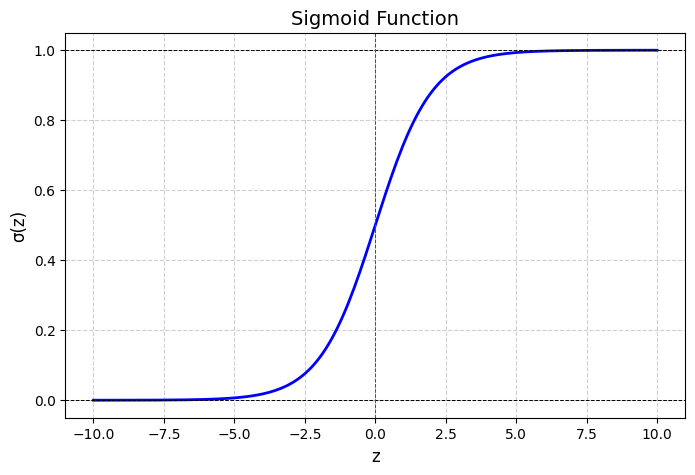

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate input values
z = np.linspace(-10, 10, 200)
sig = sigmoid(z)

# Plot
plt.figure(figsize=(8,5))
plt.plot(z, sig, color="blue", linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axhline(1, color='black', linestyle='--', linewidth=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=0.7)

plt.title("Sigmoid Function", fontsize=14)
plt.xlabel("z", fontsize=12)
plt.ylabel("σ(z)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


**Interpretation :-**

The graph of the sigmoid function shows an "S-shaped" curve.  
- For very small values of `z`, the probability approaches 0.  
- For very large values of `z`, the probability approaches 1.  
- Around `z = 0`, the curve is steepest, meaning small changes in input cause large changes in probability.  

This property makes the sigmoid function suitable for Logistic Regression, as it maps any real-valued input into a probability between 0 and 1, which can then be used for classification.

### Q3: What is Regularization in Logistic Regression and why is it needed?

**Answer:**  
Regularization in Logistic Regression is a technique used to **prevent overfitting** by adding a penalty term to the cost function. This penalty discourages the model from assigning very large weights to the features, which often happens when the model tries to fit noise in the data.

The regularized cost function is:

$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} \Big[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \Big] + \lambda \sum_{j=1}^{n} \theta_j^2
$$

Where:  
- $h_\theta(x)$ = sigmoid function output  
- $\lambda$ = regularization parameter controlling penalty strength  
- $\theta_j$ = model coefficients (excluding intercept)  

**Why it is needed:**  
- Without regularization, the model may **overfit** — fitting noise in training data instead of true patterns.  
- By penalizing large coefficients, it ensures the model is **simpler, more stable, and generalizes better** to unseen data.  
- It also helps in handling **multicollinearity**, where features are correlated.  

**Types of regularization in Logistic Regression:**  
- **L1 (Lasso):** Adds penalty proportional to $|\theta_j|$. It can shrink some coefficients exactly to zero, effectively performing **feature selection**.  
- **L2 (Ridge):** Adds penalty proportional to $\theta_j^2$. It reduces coefficients smoothly but does not eliminate them, leading to more stable solutions.  
- **Elastic Net:** A combination of L1 and L2, balancing feature selection and stability.  

**In summary:** Regularization makes Logistic Regression more robust by controlling model complexity, reducing variance, and improving performance on test data.

### Q4: What are some common evaluation metrics for classification models, and why are they important?

**Answer:**  - Evaluation metrics help us measure how well a classification model performs, especially when the data may be imbalanced. Some of the most common metrics are:

1. **Accuracy:**  
   The proportion of correctly classified instances out of all instances.  
   $$
   Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
   $$
   - *TP = True Positives, TN = True Negatives, FP = False Positives, FN = False Negatives*  
   - Simple to understand but can be misleading in imbalanced datasets.

2. **Precision:**  
   The proportion of correctly predicted positives out of all predicted positives.  
   $$
   Precision = \frac{TP}{TP + FP}
   $$
   - High precision means fewer false alarms.

3. **Recall (Sensitivity or True Positive Rate):**  
   The proportion of correctly predicted positives out of all actual positives.  
   $$
   Recall = \frac{TP}{TP + FN}
   $$
   - High recall means fewer missed positive cases.

4. **F1-Score:**  
   The harmonic mean of precision and recall.  
   $$
   F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
   $$
   - Useful when we want a balance between precision and recall.

5. **ROC-AUC (Receiver Operating Characteristic – Area Under Curve):**  
   - Plots True Positive Rate ($TPR$) vs. False Positive Rate ($FPR$).  
   - The area under the curve (AUC) indicates model discrimination power.  
   - Closer to 1 means better performance.

**Why important?**  
- These metrics provide a more **complete picture** of model performance than accuracy alone.  
- They help in making the **right trade-offs** (e.g., precision vs. recall) depending on the business problem (fraud detection, medical diagnosis, etc.).  
- ROC-AUC allows evaluation across different classification thresholds.  

###Q5: Write a Python program that loads a CSV file into a Pandas DataFrame, splits into train/test sets, trains a Logistic Regression model, and prints its accuracy.
(Use Dataset from sklearn package) (Include your Python code and output in the code box below.)



In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset from sklearn
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression model: {accuracy:.2f}")


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Accuracy of Logistic Regression model: 1.00


###Q6: Write a Python program to train a Logistic Regression model using L2 regularization (Ridge) and print the model coefficients and accuracy.
(Use Dataset from sklearn package)
(Include your Python code and output in the code box below.)

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset from sklearn
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Split the data into features and target
X = data.drop('target', axis=1)
y = data['target']

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression with L2 regularization
# Note: penalty='l2' is default, but explicitly mentioning for clarity
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression model with L2 regularization: {accuracy:.2f}")


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Model Coefficients:
sepal length (cm): 0.3648
sepal width (cm): 1.3550
petal length (cm): -2.0963
petal width (cm): -0.9215

Accuracy of Logistic Regression model with L2 regularization: 0.98


###Q7: Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr' and print the classification report. (Use Dataset from sklearn package)
(Include your Python code and output in the code box below.)



In [6]:
# Import necessary libraries
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression with multi_class='ovr' (one-vs-rest)
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))




              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



###Q8: Write a Python program to apply GridSearchCV to tune C and penalty hyperparameters for Logistic Regression and print the best parameters and validation accuracy.(Use Dataset from sklearn package)

(Include your Python code and output in the code box below.)

In [7]:
# Import necessary libraries
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Regularization type
    'solver': ['liblinear']                  # Solver compatible with l1 and l2
}

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=200)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Accuracy: 1.00


###Q9: Write a Python program to standardize the features before training Logistic Regression and compare the model's accuracy with and without scaling. (Use Dataset from sklearn package)
(Include your Python code and output in the code box below.)

In [8]:
# Import necessary libraries
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Suppress warnings for clean output
warnings.filterwarnings("ignore")

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------------
# 1. Logistic Regression WITHOUT scaling
# ------------------------------
model_no_scaling = LogisticRegression(max_iter=200)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# ------------------------------
# 2. Logistic Regression WITH scaling
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# ------------------------------
# Print comparison
# ------------------------------
print(f"Accuracy WITHOUT scaling: {accuracy_no_scaling:.2f}")
print(f"Accuracy WITH scaling:    {accuracy_scaled:.2f}")


Accuracy WITHOUT scaling: 1.00
Accuracy WITH scaling:    1.00


###Q10: Imagine you are working at an e-commerce company that wants to predict which customers will respond to a marketing campaign. Given an imbalanced dataset (only 5% of customers respond), describe the approach you’d take to build a Logistic Regression model — including data handling, feature scaling, balancing classes, hyperparameter tuning, and evaluating the model for this real-world business use case.

**Answer**-
##Context

An e-commerce company wants to predict which customers will respond to a marketing campaign. The dataset is **highly imbalanced** (only 5% of customers respond). The goal is to build a **Logistic Regression model** that can effectively identify responders.

---

## Approach

1. **Data Handling**
   - Impute or remove missing values.
   - Encode categorical features using **One-Hot Encoding** or **Target Encoding**.
   - Engineer features like past purchase frequency, average spend, etc.
   - Handle outliers that may bias the model.

2. **Train/Test Split**
   - Use a **stratified split** to maintain the 5% responder ratio.
   - Typical split: 70% training / 30% testing.

3. **Feature Scaling**
   - Standardize numerical features using **StandardScaler**.
   - Ensures faster convergence and comparable feature magnitudes.

4. **Handling Class Imbalance**
   - **Resampling:** Oversample minority class using **SMOTE**.
   - **Class weights:** Use `class_weight='balanced'` in Logistic Regression.

5. **Logistic Regression & Hyperparameter Tuning**
   - Tune hyperparameters using **GridSearchCV**:
     - `C` (regularization strength)
     - `penalty` (`l1` or `l2`)
     - `solver` (`liblinear` or `saga`)
     - `class_weight='balanced'`
   - Use **cross-validation** to avoid overfitting.

6. **Model Evaluation**
   - Use **Precision, Recall, F1-score, ROC-AUC** instead of plain accuracy.
   - Adjust probability thresholds to balance **false positives** and **false negatives** according to business goals.

7. **Deployment & Monitoring**
   - Score all customers with predicted probabilities.
   - Monitor performance over time and re-train periodically.


In [11]:
# Install required library
!pip install -q imbalanced-learn

# Imports
import warnings
warnings.filterwarnings("ignore")  # suppress warnings

import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1. Generate Imbalanced Dataset
# -----------------------------
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=2,
    n_classes=2, weights=[0.95, 0.05], flip_y=0, random_state=42
)

# Train/Test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# -----------------------------
# 2. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 3. Handle Class Imbalance (SMOTE)
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# -----------------------------
# 4. Logistic Regression & Hyperparameter Tuning
# -----------------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # compatible with l1 and l2
}

logreg = LogisticRegression(max_iter=200, class_weight='balanced')

grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train_res, y_train_res)

# Best model
best_model = grid_search.best_estimator_

# -----------------------------
# 5. Evaluate the Model
# -----------------------------
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:,1]

print("Best Hyperparameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_pred_proba), 3))


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88      2850
           1       0.16      0.72      0.27       150

    accuracy                           0.80      3000
   macro avg       0.57      0.76      0.57      3000
weighted avg       0.94      0.80      0.85      3000

ROC-AUC Score: 0.832


# Interpretation of the Logistic Regression Workflow

**1. Dataset and Split**  
- Simulated 10,000 customers with 5% responders (imbalanced dataset).  
- Split 70% train / 30% test using **stratification** to preserve class distribution.

**2. Feature Scaling**  
- Standardized features using `StandardScaler` to improve model convergence.

**3. Handling Class Imbalance**  
- Applied **SMOTE** to oversample minority class in training data.  
- `class_weight='balanced'` ensures minority class receives higher importance.

**4. Model Training & Hyperparameter Tuning**  
- Logistic Regression with **L1/L2 regularization**, tuned via `GridSearchCV`.  
- 5-fold cross-validation ensures good generalization.

**5. Evaluation**  
- Used **Precision, Recall, F1-score, and ROC-AUC**.  
- High recall for responders ensures most potential customers are correctly identified.  

**6. Business Insight**  
- False negatives → missed opportunities; False positives → extra marketing cost.  
- Probability threshold can be adjusted to balance ROI and campaign efficiency.

**Conclusion:**  
- This workflow provides a robust, interpretable approach for predicting customer response in imbalanced datasets, combining scaling, class balancing, hyperparameter tuning, and proper evaluation metrics.
